In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
obamadata =pd.read_csv("obama.csv",parse_dates=['year_month'])

In [7]:
obamadata.head()

,year_month,survey_organization,approve_percent,disapprove_percent
0,2009-01-01,ABC/Post,80.0,15.0
1,2009-01-01,AP-GFK,74.0,15.0
2,2009-01-01,CNN,84.0,14.0
3,2009-01-01,Democracy Corps (D),51.0,20.0
4,2009-01-01,Diageo/Hotline,64.0,6.5


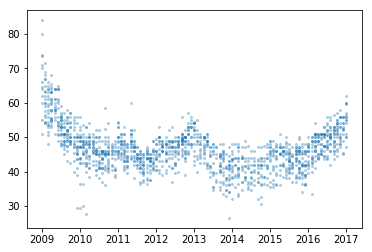

In [12]:
plt.plot(obamadata.year_month,obamadata.approve_percent,'o',markersize=2,alpha=0.3)

In [14]:
data_mean=obamadata.groupby('year_month').mean()

In [15]:
data_mean.head()

,approve_percent,disapprove_percent
year_month,,
2009-01-01,67.307692,19.346154
2009-02-01,61.500000,26.289474
2009-03-01,57.842105,34.026316
2009-04-01,59.282609,33.195652
2009-05-01,58.966667,34.900000


In [16]:
data_mean.index

DatetimeIndex(['2009-01-01', '2009-02-01', '2009-03-01', '2009-04-01',
               '2009-05-01', '2009-06-01', '2009-07-01', '2009-08-01',
               '2009-09-01', '2009-10-01', '2009-11-01', '2009-12-01',
               '2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01', '2010-11-01', '2010-12-01',
               '2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01',
               '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
      

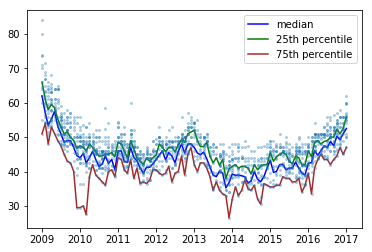

In [23]:
data_median=obamadata.groupby('year_month').median()
data_quantile25=obamadata.groupby('year_month').quantile(0.25)
data_quantile75=obamadata.groupby('year_month').quantile(0/75)
#plt.plot(data_mean.index,data_mean.approve_percent,'red')

plt.plot(data_quantile25.index,data_quantile25.approve_percent,'blue')
plt.plot(data_median.index,data_median.approve_percent,'green')
plt.plot(data_quantile75.index,data_quantile75.approve_percent,'brown')
plt.legend(['median','25th percentile','75th percentile'])
plt.plot(obamadata.year_month,obamadata.approve_percent,'o',markersize=2,alpha=0.3)
plt.show()

In [25]:
obamadata2 =pd.read_csv("obama_too_big.csv",parse_dates=['year_month'])

In [27]:
obamadata2.head()

,year_month,survey_organization,approve_percent,disapprove_percent
0,2009-01-01,Generated Data,67.0,31.0
1,2009-01-01,Harris (Phone),60.0,29.0
2,2009-01-01,Generated Data,65.9,19.1
3,2009-01-01,Generated Data,64.6,18.4
4,2009-01-01,Generated Data,83.3,11.7


In [28]:
obamadata2.shape

(65499, 4)

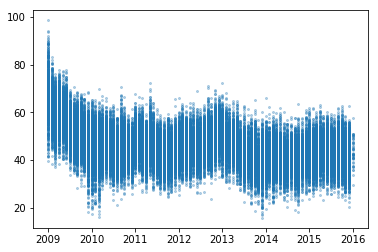

In [29]:
plt.plot(obamadata2.year_month,obamadata2.approve_percent,'o',markersize=2,alpha=0.3)
plt.show()

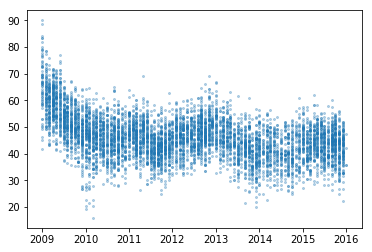

In [30]:
sampled=obamadata2.sample(frac=0.1)
plt.plot(sampled.year_month,sampled.approve_percent,'o',markersize=2,alpha=0.3)
plt.show()

In [33]:
data =pd.read_csv("countries_new.csv")
data.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [34]:
meanGDPperCapita= data.groupby(data.country).mean().gdpPerCapita

In [35]:
meanGDPperCapita.head()

country
Afghanistan     802.674598
Albania        3255.366633
Algeria        4426.025973
Angola         3607.100529
Argentina      8955.553783
Name: gdpPerCapita, dtype: float64

In [37]:
meanGDPperCapita.sort_values(ascending=False).head()

country
Kuwait           65332.910472
Switzerland      27074.334405
Norway           26747.306554
United States    26261.151347
Canada           22410.746340
Name: gdpPerCapita, dtype: float64

In [38]:
kuwait=data[data.country == "Kuwait"]
kuwait.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
852,Kuwait,Asia,1952,55.565,160000,108382.35290
853,Kuwait,Asia,1957,58.033,212846,113523.13290
854,Kuwait,Asia,1962,60.470,358266,95458.11176
855,Kuwait,Asia,1967,64.624,575003,80894.88326
856,Kuwait,Asia,1972,67.712,841934,109347.86700


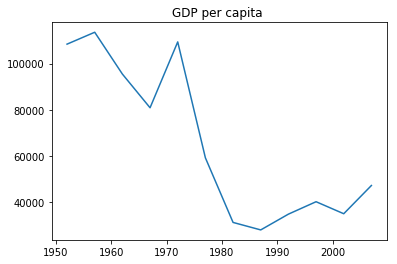

In [39]:
plt.plot(kuwait.year,kuwait.gdpPerCapita)
plt.title("GDP per capita ")
plt.show()

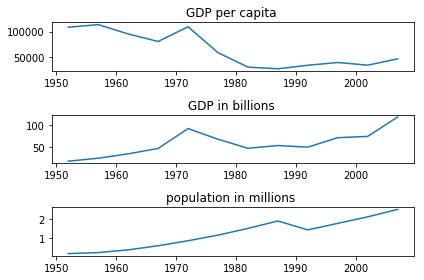

In [41]:
plt.subplot(311)
plt.plot(kuwait.year,kuwait.gdpPerCapita)
plt.title("GDP per capita ")

plt.subplot(312)
plt.plot(kuwait.year,kuwait.gdpPerCapita*kuwait.population/10**9)
plt.title("GDP in billions ")

plt.subplot(313)
plt.plot(kuwait.year,kuwait.population/10**6)
plt.title("population in millions ")
plt.tight_layout()
plt.show()

In [43]:
US=data[data.country == "United States"]
US.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
1608,United States,Americas,1952,68.44,157553000,13990.48208
1609,United States,Americas,1957,69.49,171984000,14847.12712
1610,United States,Americas,1962,70.21,186538000,16173.14586
1611,United States,Americas,1967,70.76,198712000,19530.36557
1612,United States,Americas,1972,71.34,209896000,21806.03594


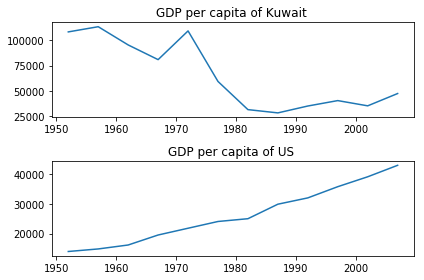

In [46]:
plt.subplot(211)
plt.plot(kuwait.year,kuwait.gdpPerCapita)
plt.title("GDP per capita of Kuwait ")

plt.subplot(212)
plt.plot(US.year,US.gdpPerCapita)
plt.title("GDP per capita of US ")
plt.tight_layout()
plt.show()

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [49]:
dataset = pd.read_csv('Salary_Data.csv')

In [50]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [57]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [58]:
x.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [59]:
print(x)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [60]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 1/3, random_state = 0)

In [61]:
linearRegressor = LinearRegression()

In [62]:
linearRegressor.fit(xTrain, yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [63]:
yPrediction = linearRegressor.predict(xTest)

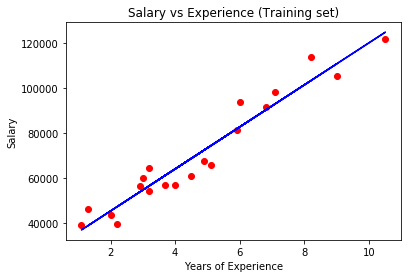

In [65]:
plt.scatter(xTrain, yTrain, color = 'red')
plt.plot(xTrain, linearRegressor.predict(xTrain), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [66]:
yPrediction=linearRegressor.predict(12)

ValueError: Expected 2D array, got scalar array instead:
array=12.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [69]:
from sklearn.metrics import mean_squared_error, r2_score

In [70]:
print('Coefficients: \n', linearRegressor.coef_)

Coefficients: 
 [9345.94244312]


In [71]:
print('Variance score: %.2f' % r2_score(yTest, yPrediction))

Variance score: 0.97


In [72]:
dataset = pd.read_csv('auto-mpg.csv')

In [73]:
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [75]:
dataset.shape

(398, 7)

In [76]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      396 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model-year      398 non-null int64
dtypes: float64(4), int64(3)
memory usage: 21.8 KB


In [77]:
dataset.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
count,398.000000,398.000000,398.000000,396.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.189394,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.402030,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [78]:
dataset.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      2
weight          0
acceleration    0
model-year      0
dtype: int64

In [79]:
dataset.dropna()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
5,15.0,8,429.0,198.0,4341,10.0,70
6,14.0,8,454.0,220.0,4354,9.0,70
7,14.0,8,440.0,215.0,4312,8.5,70
8,14.0,8,455.0,225.0,4425,10.0,70
9,15.0,8,390.0,190.0,3850,8.5,70


In [80]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      396 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model-year      398 non-null int64
dtypes: float64(4), int64(3)
memory usage: 21.8 KB


In [82]:
import numpy as np

dataset = dataset.replace('?', np.nan)
dataset = dataset.dropna()

In [83]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396 entries, 0 to 397
Data columns (total 7 columns):
mpg             396 non-null float64
cylinders       396 non-null int64
displacement    396 non-null float64
horsepower      396 non-null float64
weight          396 non-null int64
acceleration    396 non-null float64
model-year      396 non-null int64
dtypes: float64(4), int64(3)
memory usage: 24.8 KB


In [84]:
X = dataset.iloc[:,0]

In [88]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [89]:
X = dataset.iloc[:,0]

In [90]:
X

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
5      15.0
6      14.0
7      14.0
8      14.0
9      15.0
10     15.0
11     14.0
12     15.0
13     14.0
14     24.0
15     22.0
16     18.0
17     21.0
18     27.0
19     26.0
20     25.0
21     24.0
22     25.0
23     26.0
24     21.0
25     10.0
26     10.0
27     11.0
28      9.0
29     27.0
       ... 
368    27.0
369    34.0
370    31.0
371    29.0
372    27.0
373    24.0
374    23.0
375    36.0
376    37.0
377    31.0
378    38.0
379    36.0
380    36.0
381    36.0
382    34.0
383    38.0
384    32.0
385    38.0
386    25.0
387    38.0
388    26.0
389    22.0
390    32.0
391    36.0
392    27.0
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 396, dtype: float64

In [91]:
X = dataset.drop('mpg', axis=1)

In [92]:
X

,cylinders,displacement,horsepower,weight,acceleration,model-year
0,8,307.0,130.0,3504,12.0,70
1,8,350.0,165.0,3693,11.5,70
2,8,318.0,150.0,3436,11.0,70
3,8,304.0,150.0,3433,12.0,70
4,8,302.0,140.0,3449,10.5,70
5,8,429.0,198.0,4341,10.0,70
6,8,454.0,220.0,4354,9.0,70
7,8,440.0,215.0,4312,8.5,70
8,8,455.0,225.0,4425,10.0,70
9,8,390.0,190.0,3850,8.5,70


In [93]:
Y=dataset[['mpg']]

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

In [96]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [97]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cylinders is -0.057803806487525755
The coefficient for displacement is 0.004424525890077047
The coefficient for horsepower is 0.0032438222561092713
The coefficient for weight is -0.007039413497846586
The coefficient for acceleration is 0.09130440590489401
The coefficient for model-year is 0.7624442869063442


In [98]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -15.849935024363916


In [106]:
regression_model.score(X_test, y_test)
#regression_model.predict([[4, 121, 110, 2800, 15.4, 81, 0, 1, 0]])

0.8000415574837856

In [101]:
y_predict = regression_model.predict(X_test)
regression_model_mse = mean_squared_error(y_predict, y_test)

regression_model_mse

12.137645571903107

In [102]:
import math

math.sqrt(regression_model_mse)

3.483912394407056

In [107]:
regression_model.predict([[4, 121, 110, 2800, 15.4, 81,]])

array([[28.26475513]])

In [109]:
diabetesdata= pd.read_csv("diabetes.csv")

In [111]:
diabetesdata.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [112]:
import seaborn as sns

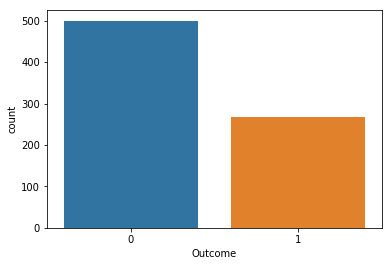

In [114]:
sns.countplot(diabetesdata['Outcome'],label="Count")

In [119]:
diabetesdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [120]:
diabetesdata.isnull().values.any()

False

In [121]:
X = diabetesdata.drop('Outcome', axis=1)

In [123]:
Y=diabetesdata[['Outcome']]

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.7, random_state=1)
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [141]:
diabetes_y_pred = regression_model.predict(X_test)
print('Variance score: %.2f' % r2_score(y_test, diabetes_y_pred))

Variance score: 0.27


In [135]:
y_predict = regression_model.predict(X_test)
regression_model_mse = mean_squared_error(y_predict, y_test)

regression_model_mse

0.16515212350273892

In [136]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Pregnancies is 0.022694981326560656
The coefficient for Glucose is 0.005171350579217109
The coefficient for BloodPressure is -0.003874290520821664
The coefficient for SkinThickness is -0.0014491754783074024
The coefficient for Insulin is 0.00038270029592807044
The coefficient for BMI is 0.015298618497855914
The coefficient for DiabetesPedigreeFunction is 0.18385836656578664
The coefficient for Age is 0.002502117698589773


In [143]:
from sklearn import datasets, linear_model

In [144]:
diabetes = datasets.load_diabetes()

In [147]:
diabetes_X_train = diabetes_X[:-20]

NameError: name 'diabetes_X' is not defined

In [161]:
Immigration= pd.read_csv("CanadaImmigration.csv")
Immigration = Immigration.sort_values('Year',ascending=False)

In [162]:
Immigration.head()

,Year,USA,UK
12,2016,2285,1809
11,2015,7523,5451
10,2014,8491,5758
9,2013,8486,5814
8,2012,7870,6172


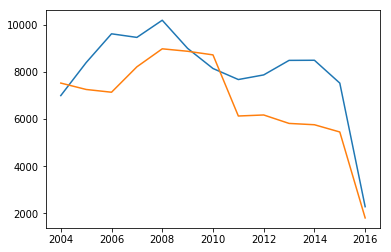

In [163]:
plt.plot(Immigration.Year,Immigration.USA)
plt.plot(Immigration.Year,Immigration.UK)
plt.show()

In [164]:
X = Immigration[['Year']]

In [165]:
Y= Immigration[['USA']]

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [167]:
Ypred = regression_model.predict(X_test)
print('Variance score: %.2f' % r2_score(y_test, Ypred))

Variance score: -5.44


In [168]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Year is -327.65397350993373


In [169]:
regression_model.predict([[2017]])

array([[5263.50331126]])

In [170]:
diabetes = datasets.load_diabetes()

In [171]:
diabeted.head()

NameError: name 'diabeted' is not defined

In [172]:
diabetesdata= pd.read_csv("diabetes.csv")

In [173]:
diabetesdata.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


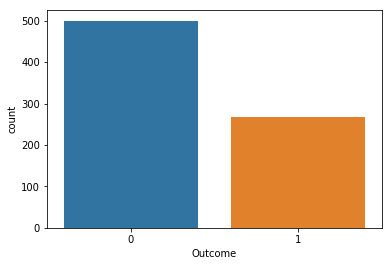

In [174]:
sns.countplot(diabetesdata['Outcome'],label="Count")

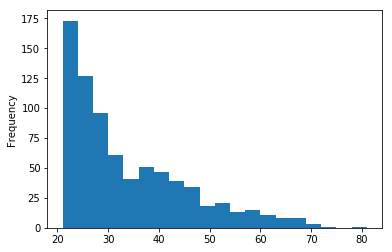

In [176]:
diabetesdata["Age"].plot.hist(bins=20)

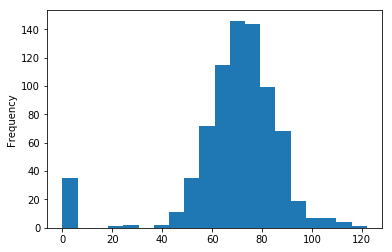

In [177]:
diabetesdata["BloodPressure"].plot.hist(bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014E8D4E6518>,
      dtype=object)

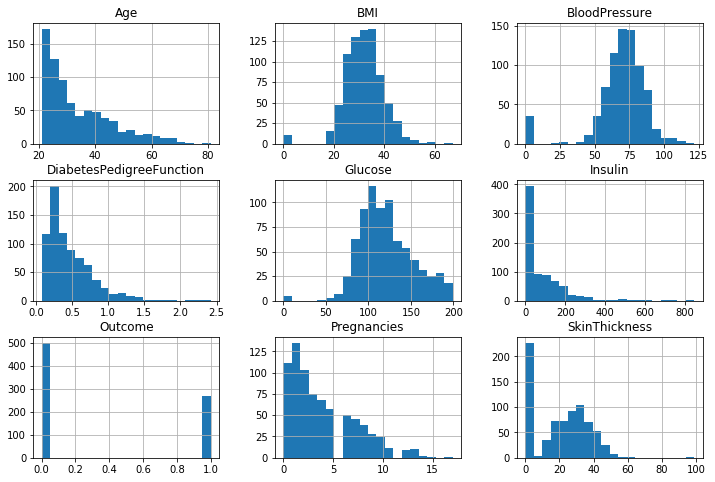

In [178]:
diabetesdata.hist(figsize=(12,8),bins=20)

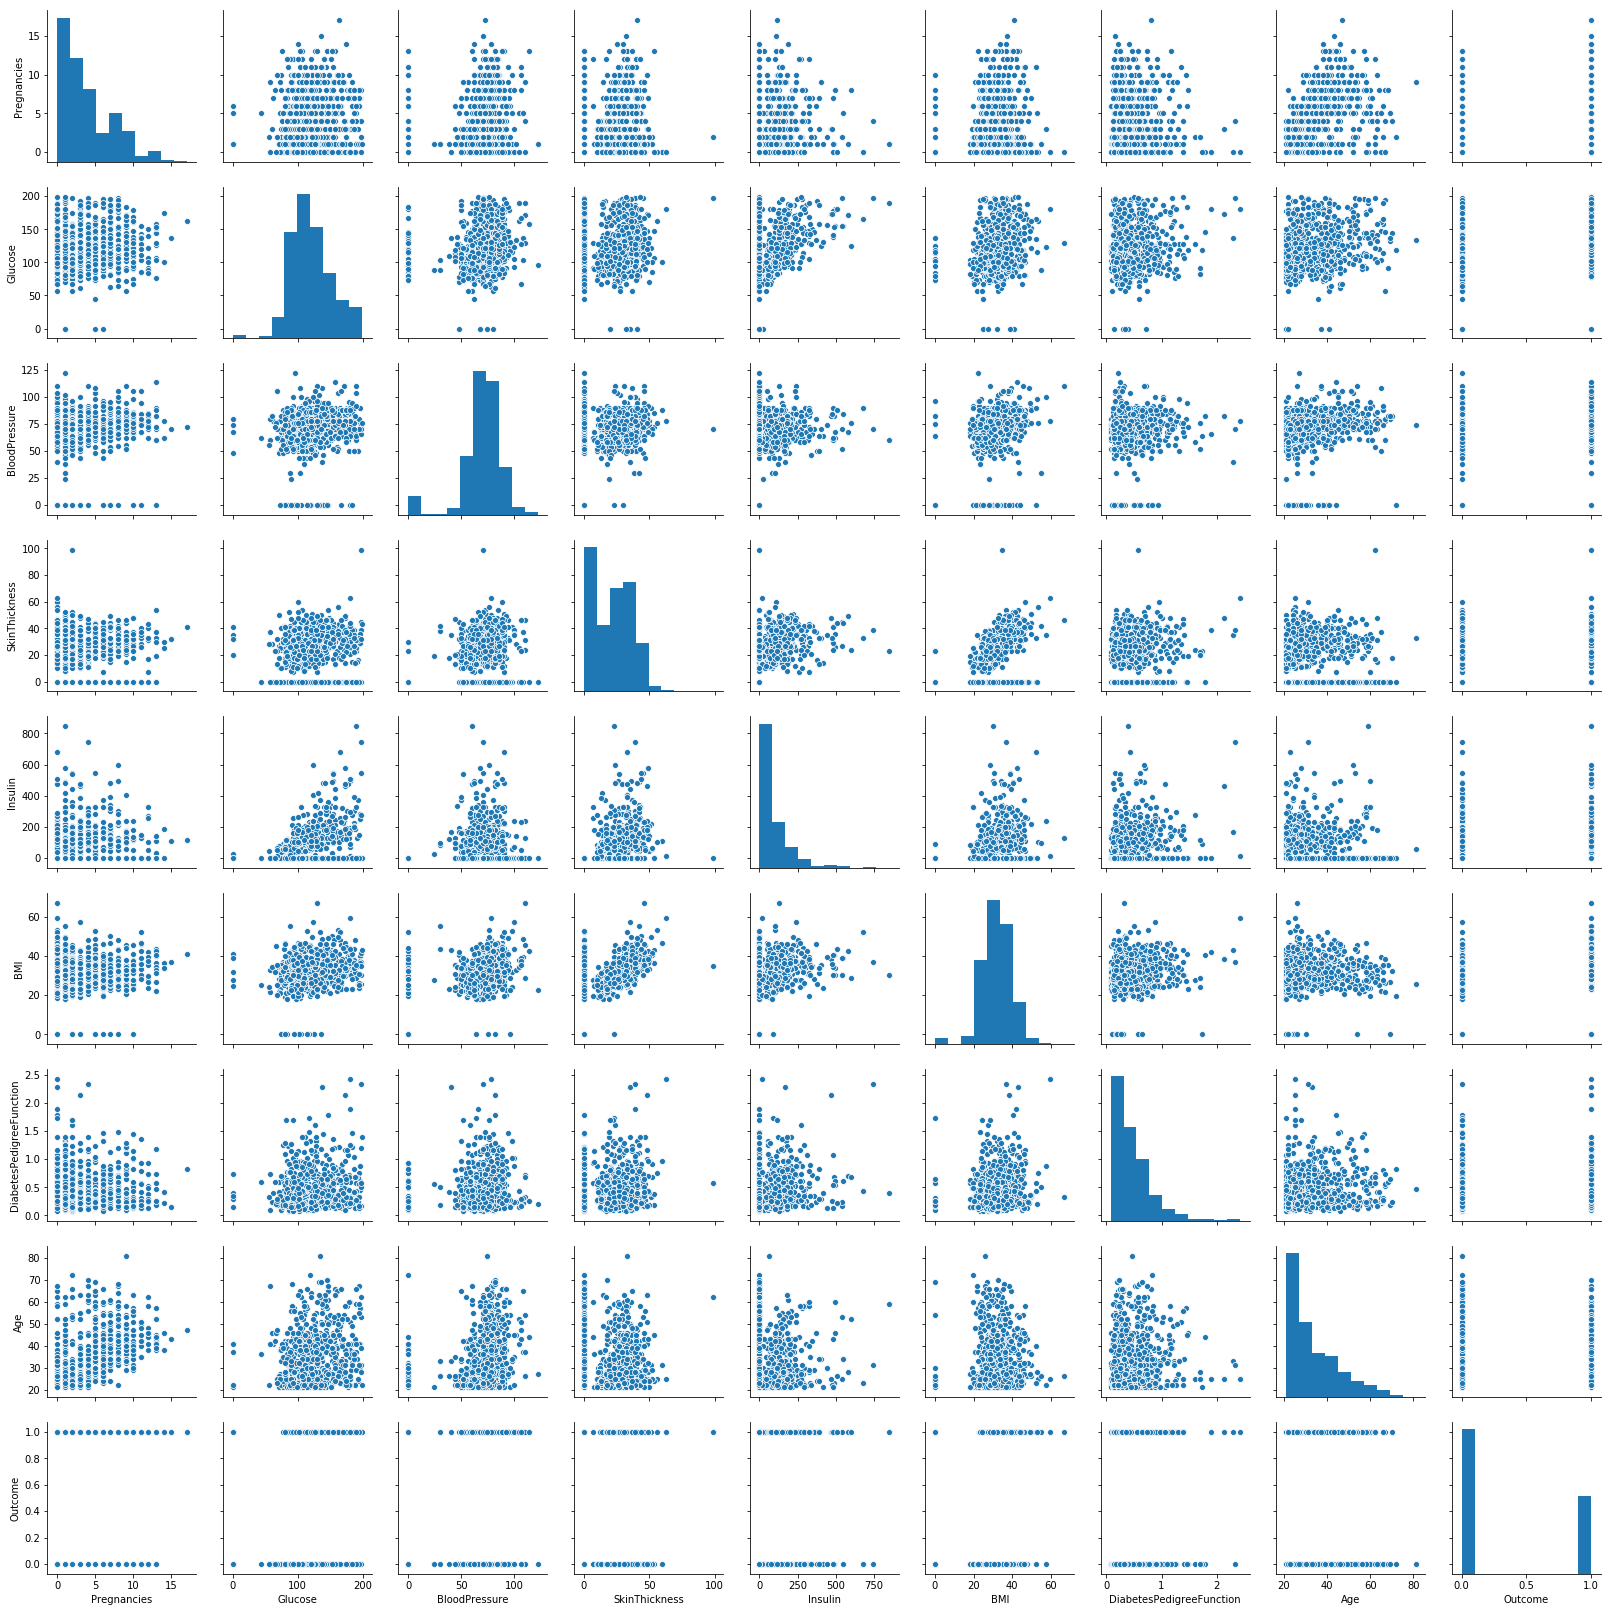

In [179]:
sns.pairplot(diabetesdata)

In [180]:
diabetesdata.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [181]:
co = diabetesdata.corr()

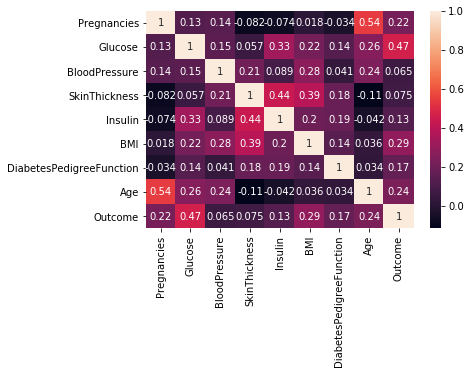

In [182]:
sns.heatmap(co, annot=True)

In [183]:
X = diabetesdata.drop('Outcome', axis=1)
Y=diabetesdata[['Outcome']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.7, random_state=1)

In [186]:
from sklearn.linear_model import LogisticRegression

In [187]:
logmodel=LogisticRegression()

In [188]:
logmodel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [189]:
pred= logmodel.predict(X_test)

In [190]:
from sklearn.metrics import classification_report

In [191]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.76      0.86      0.81       354\n           1       0.64      0.49      0.55       184\n\n   micro avg       0.73      0.73      0.73       538\n   macro avg       0.70      0.67      0.68       538\nweighted avg       0.72      0.73      0.72       538\n'

In [193]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)


array([[303,  51],
       [ 94,  90]], dtype=int64)

In [194]:
from sklearn.metrics import accuracy_score

In [195]:
accuracy_score(y_test,pred)

0.7304832713754646

In [7]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#sns.countplot(diabetesdata['Outcome'],label="Count")

titanicdata= pd.read_csv("train.csv")

In [8]:
titanicdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


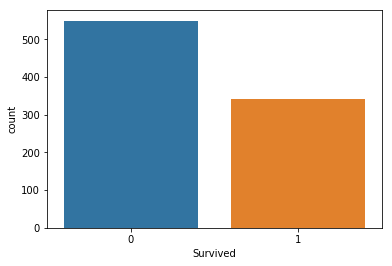

In [9]:
sns.countplot(titanicdata['Survived'],label="Count")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C110926748>,
      dtype=object)

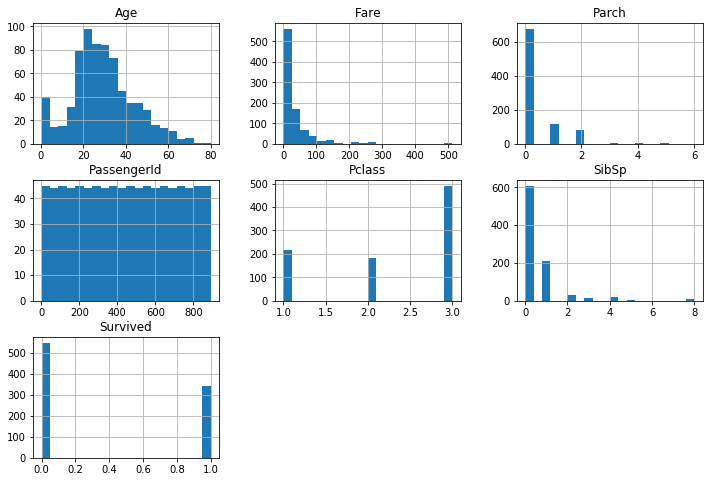

In [10]:
titanicdata.hist(figsize=(12,8),bins=20)

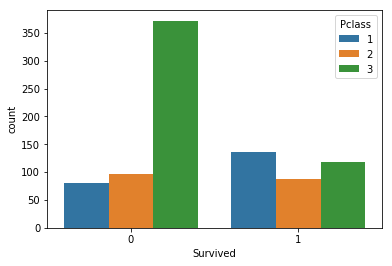

In [18]:
sns.countplot(x="Survived",hue="Pclass",data=titanicdata)

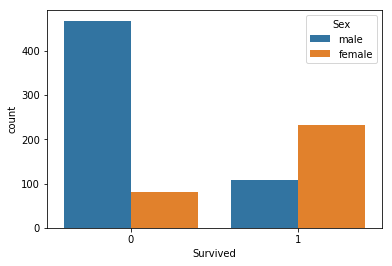

In [19]:
sns.countplot(x="Survived",hue="Sex",data=titanicdata)

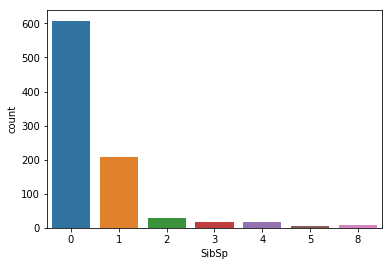

In [21]:
sns.countplot(x="SibSp",data=titanicdata)

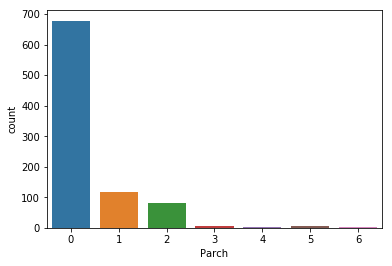

In [22]:
sns.countplot(x="Parch",data=titanicdata)

In [24]:
titanicdata.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [25]:
titanicdata.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

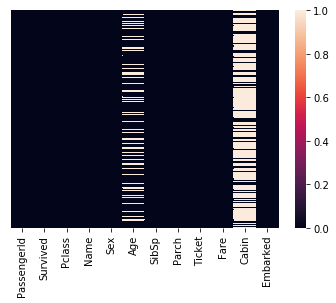

In [27]:
sns.heatmap(titanicdata.isnull(),yticklabels=False)

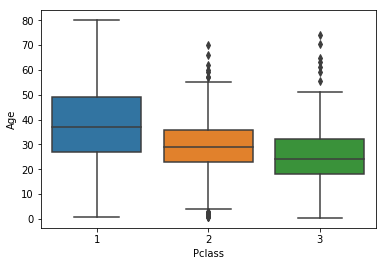

In [29]:
sns.boxplot(x="Pclass",y="Age",data=titanicdata)

In [32]:
titanicdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [31]:
titanicdata.drop("Cabin",axis=1,inplace=True)

In [33]:
titanicdata.dropna(inplace=True)

In [34]:
titanicdata.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [39]:
sex = pd.get_dummies(titanicdata["Sex"],drop_first=True)

In [40]:
embark = pd.get_dummies(titanicdata["Embarked"],drop_first=True)

In [41]:
pclass = pd.get_dummies(titanicdata["Pclass"],drop_first=True)

In [44]:
titanicdata= pd.concat([titanicdata,sex,embark,pclass],axis=1)

In [45]:
titanicdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [49]:
titanicdata.drop(["Sex","Embarked","PassengerId","Name","Ticket"],axis=1,inplace=True)

In [50]:
titanicdata.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,1


In [52]:
x=titanicdata.drop("Survived",axis=1)
y=titanicdata["Survived"]

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
logmodel=LogisticRegression()

In [60]:
logmodel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [61]:
pred= logmodel.predict(X_test)

In [62]:
classification_report(y_test,pred)

NameError: name 'classification_report' is not defined

In [63]:
from sklearn.metrics import confusion_matrix

In [64]:
confusion_matrix(y_test,pred)

array([[105,  21],
       [ 25,  63]], dtype=int64)

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.7850467289719626